<a href="https://colab.research.google.com/github/Taka0007/2023-seminar-previous.term/blob/main/CSE4_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 下準備

In [1]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio

In [2]:
# wavファイルを読み込む
!wget https://github.com/Taka0007/2023-seminar-previous.term/raw/main/wav-files/aiueo.wav -O aiueo.wav
file_path = '/content/aiueo.wav'
audio_data, sr = librosa.load(file_path)

--2023-06-14 06:43:33--  https://github.com/Taka0007/2023-seminar-previous.term/raw/main/wav-files/aiueo.wav
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Taka0007/2023-seminar-previous.term/main/wav-files/aiueo.wav [following]
--2023-06-14 06:43:33--  https://raw.githubusercontent.com/Taka0007/2023-seminar-previous.term/main/wav-files/aiueo.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32832 (32K) [audio/wav]
Saving to: ‘aiueo.wav’

aiueo.wav           100%[===================>]  32.06K  --.-KB/s    in 0.003s  

2023-06-14 06:43:33 (10.6 MB/s) - ‘aiueo.wav’ saved [32832/32832]



<ipython-input-2-d914532de5f4>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


## 演習2

<ipython-input-11-7bda09f4f8c6>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  x, _ = librosa.load('aiueo.wav', sr=SR)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


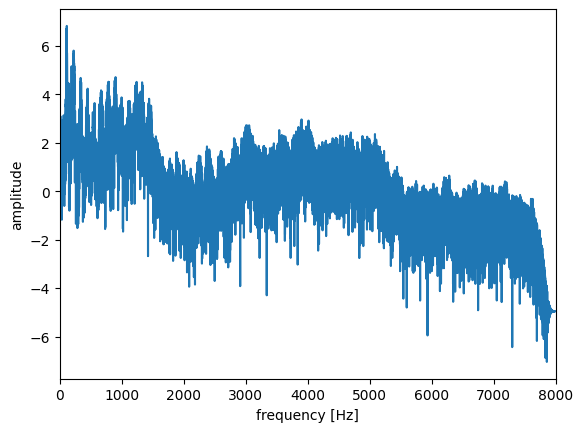

In [ ]:
# サンプリングレート
SR = 16000

#音声ファイルの読み込み
x, _ = librosa.load('aiueo.wav', sr=SR)

#高速フーリエ変換
fft_spec = np.fft.rfft(x)

#複素スペクトルを変換
fft_log_abs_spec = np.log(np.abs(fft_spec))

# スペクトログラムを描画

#x軸のラベルを設定
plt.xlabel('frequency [Hz]')

# y軸のラベルを設定
plt.ylabel('amplitude')

 # x軸の範囲を設定
plt.xlim([0, SR/2])

x_data = np.linspace((SR/2)/len(fft_log_abs_spec), SR/2, len(fft_log_abs_spec))
plt.plot(x_data, fft_log_abs_spec)
plt.show()

## 演習5

<ipython-input-3-6c43c235236f>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  x, _ = librosa.load('aiueo.wav', sr=SR)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


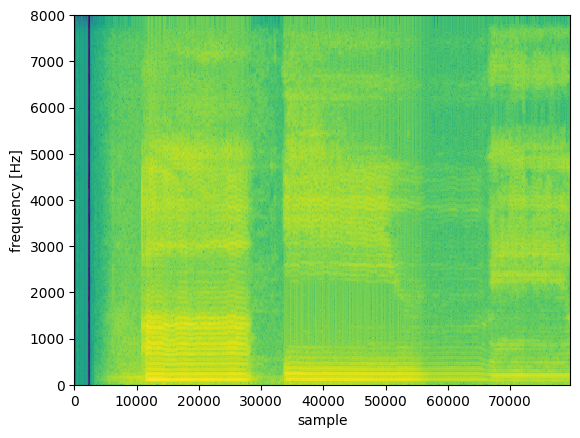

In [3]:
SR = 16000

# 音声ファイルの読み込み
x, _ = librosa.load('aiueo.wav', sr=SR)

# フレームサイズ
size_frame = 512

# フレームサイズに合わせてハミング窓を作成
hamming_window = np.hamming(size_frame)

# シフトサイズ
size_shift = 16000 / 100

# スペクトログラムを保存するリスト
spectrogram = []

for i in np.arange(0, len(x)-size_frame, size_shift):
    # 該当フレームのデータを取得
    idx = int(i)
    x_frame = x[idx:idx+size_frame]

    # 窓掛けしたデータをFFT
    fft_spec = np.fft.rfft(x_frame * hamming_window)

    # 複素スペクトログラムを対数振幅スペクトログラムに
    fft_log_abs_spec = np.log(np.abs(fft_spec))

    # 計算した対数振幅スペクトログラムを配列に保存
    spectrogram.append(fft_log_abs_spec)

# スペクトログラムを画像に表示・保存
fig = plt.figure()
plt.xlabel('sample')
plt.ylabel('frequency [Hz]')
plt.imshow(
    np.flipud(np.array(spectrogram).T),
    extent=[0, len(x), 0, SR/2],
    aspect='auto',
    interpolation='nearest'
)
plt.show()